In [1]:
#list of text items, each item is one row of x matrix, text item whole lyrics or whole line, labels are 0 and 1 

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df_flefox =pd.read_csv('flefox.txt')

In [3]:
df_flefox['label'] = 0

In [4]:
df_cas = pd.read_csv('cig_after_s.txt')

In [9]:
df_diiv=pd.read_csv('DIIV.txt')

In [10]:
df_diiv1=pd.read_csv('DIIV_1.txt')

In [11]:
data = [df_diiv, df_diiv1]
df_DIIV = pd.concat(data)

In [12]:
#for i in range(len(df_DIIV[:])):
    #df_DIIV['song_lyric'][i]=df_DIIV['song_lyric'][i].replace('\n',' ')

In [13]:
df_DIIV.reset_index()
#when you preprocess you can go into the links and use it in a programme (that uses a function

,index,Unnamed: 0,title,links,song_lyric
0,0,0,Horsehead,https://www.lyrics.com/lyric/36566183/DIIV/Hor...,I've seen the middle of\nFive foot airtight wa...
1,1,1,Like Before You Were Born,https://www.lyrics.com/lyric/36566182/DIIV/Lik...,The wind fans deadpan\nWe plummet through the ...
2,2,2,Skin Game,https://www.lyrics.com/lyric/36566181/DIIV/Ski...,One afterthought on a skin game\nI took it as ...
3,3,3,Between Tides,https://www.lyrics.com/lyric/36566180/DIIV/Bet...,"On and on, the clock was wrong\nYou've been nu..."
4,4,4,Taker,https://www.lyrics.com/lyric/36566179/DIIV/Taker,You watched my lips make\nThe promise I betray...
5,5,5,For the Guilty,https://www.lyrics.com/lyric/36566178/DIIV/For...,Love revenge\nLove redemption\nRise and fall\n...
6,6,6,Lorelei,https://www.lyrics.com/lyric/36566176/DIIV/Lor...,"Dog-star, ram, and pomegranate\nFox swam and s..."
7,7,7,Blankenship,https://www.lyrics.com/lyric/36566175/DIIV/Bla...,Armageddon is a product\nAnd one we choose to ...
8,8,8,Acheron,https://www.lyrics.com/lyric/36566174/DIIV/Ach...,This heart-pounding day has finally arrived\nA...
9,9,9,Out of Mind,https://www.lyrics.com/lyric/32524600/DIIV/Out...,Yeah out of sight\nAnd out of mind\nBut everyt...


In [14]:
df_DIIV['label'] =1

In [31]:
data = [df_DIIV, df_flefox]
df_both = pd.concat(data)
df_both

,Unnamed: 0,title,links,song_lyric,label
0,0,Horsehead,https://www.lyrics.com/lyric/36566183/DIIV/Hor...,I've seen the middle of\nFive foot airtight wa...,1
1,1,Like Before You Were Born,https://www.lyrics.com/lyric/36566182/DIIV/Lik...,The wind fans deadpan\nWe plummet through the ...,1
2,2,Skin Game,https://www.lyrics.com/lyric/36566181/DIIV/Ski...,One afterthought on a skin game\nI took it as ...,1
3,3,Between Tides,https://www.lyrics.com/lyric/36566180/DIIV/Bet...,"On and on, the clock was wrong\nYou've been nu...",1
4,4,Taker,https://www.lyrics.com/lyric/36566179/DIIV/Taker,You watched my lips make\nThe promise I betray...,1
...,...,...,...,...,...
52,52,Bedouin Dress [Album],https://www.lyrics.com/lyric/28911009/Fleet+Fo...,If to borrow is to take and not return\nI have...,0
53,53,Sim Sala Bim [Album],https://www.lyrics.com/lyric/28911008/Fleet+Fo...,"He was so kind, such a gentleman tied to the o...",0
54,54,Battery Kinzie [Album],https://www.lyrics.com/lyric/28911007/Fleet+Fo...,I woke up one morning\nAll my fingers rotten\n...,0
55,55,The Plains / Bitter Dancer [Album],https://www.lyrics.com/lyric/28911006/Fleet+Fo...,Just as the sand made everything round\nJust a...,0


In [16]:
df_both.reset_index(inplace=True)

In [17]:
#like X
X = df_both['song_lyric']

#like y 
y = df_both['label']  

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, stratify=y)

In [19]:
def Countvect_fit_transf(Xtrain, ytrain):
    vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1, 3), min_df=0.03, max_df=0.95) #also play with putting min and max
    X = vectorizer.fit_transform(Xtrain)
    X_cv= pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out(),index = ytrain)
    return X_cv , vectorizer

def Countvect_transf(Xtest, ytest, self_vectorizer): 
    X = self_vectorizer.transform(Xtest)
    X_cv= pd.DataFrame(X.todense(), columns=self_vectorizer.get_feature_names(),index = ytest)
    return X_cv

#def Countvect_transf_input(inputX, self_vectorizer): 
    #X = self_vectorizer.transform([inputX])
   # X_cv= pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
   # return X_cv

In [20]:
Xtrain_trans, self_vectorizer = Countvect_fit_transf(Xtrain, ytrain)
Xtrain_trans

,act,ain,air,alive,ancient,animal,arm,ashen,away,away oh,...,word,words,work,world,wouldn,wrong,yeah,years,young,youth
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.247996,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.166819,0.000000,0.0,0.166819,0.0,0.0,0.0
0,0.0,0.0,0.0,0.344228,0.000000,0.0,0.132985,0.0,0.000000,0.000000,...,0.000000,0.114743,0.0,0.106550,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.337995,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
0,0.0,0.0,0.0,0.000000,0.150632,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.369385,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0


In [21]:
#Xtrain_trans = pd.DataFrame(Xtrain_trans)  #.todense(), columns=vectorizer.get_feature_names_out(), index=labels)

In [22]:
Xtest_trans = Countvect_transf(Xtest, ytest,self_vectorizer)

C:\Users\alexp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
Xtest_trans
#why are there values of 0.9999 etc?? 

,act,ain,air,alive,ancient,animal,arm,ashen,away,away oh,...,word,words,work,world,wouldn,wrong,yeah,years,young,youth
label,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.247996,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.128420,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.163468
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.181849,0.000000
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.246041,0.0,0.0,0.000000,0.273194,0.000000


In [24]:
#export test data as csv (for using in terminal with argparse)

#NOTE !!!! do we need to make a new train test split from out train data for these models to prevent leakage (since we are exporting and testing within this notebook)



In [25]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
#better metrics than accuracy !

In [26]:
#function to show output! fleetfoxes =0, DIIV = 1

def scoring_function (ytrue, ypred, estimator_name):
    print(f'Accuracy score of {estimator_name}: {accuracy_score(ytrue, ypred)} ')
    print(f'Precision score of {estimator_name}: {precision_score(ytrue, ypred)} ')
    print(f'Recall score of {estimator_name}: {recall_score(ytrue, ypred)} ')
    print(f'F1 score of {estimator_name}: {f1_score(ytrue, ypred)} ')
    cm = confusion_matrix (ytrue, ypred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Fleet Foxes', 'DIIV'])
    disp.plot() 

In [27]:
#model rf 
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf_clf1 = RandomForestClassifier(max_depth=7, n_estimators=50, random_state=21, class_weight='balanced') 
#max depth is how deeply the tree will go with nodes (since so many features try more than tried in other models)
#n_estimators is trees in the forest (each tree is starting with diff random bits of data??)

In [29]:
rf_clf1.fit(Xtrain_trans, ytrain)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=50,
                       random_state=21)

In [30]:
ypred_rf1 = rf_clf1.predict(Xtest_trans)

Accuracy score of RandomForestClassifier: 0.8275862068965517 
Precision score of RandomForestClassifier: 0.75 
Recall score of RandomForestClassifier: 1.0 
F1 score of RandomForestClassifier: 0.8571428571428571 


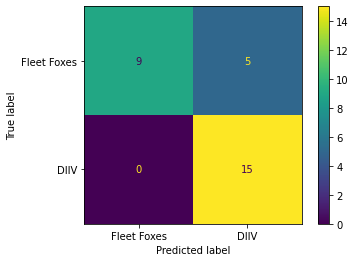

In [31]:
scoring_function(ytest, ypred_rf1, 'RandomForestClassifier') #overall good scores

In [32]:
#Multinomial NB 
from sklearn.naive_bayes import MultinomialNB

In [33]:
clf_NB2 = MultinomialNB()

In [34]:
clf_NB2.fit(Xtrain_trans, ytrain)

MultinomialNB()

In [35]:
ypred_NB2 = clf_NB2.predict(Xtest_trans)
ypred_NB2

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1], dtype=int64)

Accuracy score of MultinomialNB: 0.7931034482758621 
Precision score of MultinomialNB: 0.7647058823529411 
Recall score of MultinomialNB: 0.8666666666666667 
F1 score of MultinomialNB: 0.8125 


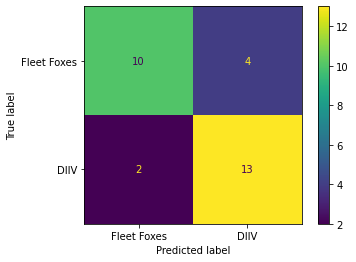

In [36]:
scoring_function(ytest, ypred_NB2, 'MultinomialNB')

In [ ]:
#https://towardsdatascience.com/good-grams-how-to-find-predictive-n-grams-for-your-problem-c04a5f320b39

In [ ]:
#cell below-> do I want to incorporate FE options as input?? can combine above input in function with pipeline below? 

In [ ]:
# pipeline for naive bayes wit vectorization 
naive_bayes_pipeline = Pipeline([
    ('bow_transformer', CountVectorizer(analyzer=split_into_lemmas, stop_words='english')),
    ('tf_idf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])


In [ ]:
#pipeline for different classifiers -Q: diff metrics here for same type of classifiers poss 
clfs = []

clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())

In [134]:
#function to make a pipeline of different classifiers
for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train_trans, y_train)
    scoring_function(ytest, ypred_rf1, clfs)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

In [ ]:
#for pickling output into a file to use in CLI
import pickle

with open ('my_estimator.pkl', 'wb') as my_file:
    pickle.dump(my_variable, my_file)
    
#go into script 
with open ('my_estimator', 'rb') as my_file:
    my_estimator = pickle.load(my_file)
    
my_estimator.predict_proba(X_test) #gives probability Xtest belongs to one class (class1)

In [ ]:
#reading a non pickle file type in CLI 
import argparse, pathlib

parser = argparse.ArgumentParser()
parser.add_argument('file', type=pathlib.Path)
args = parser.parse_args()

with args.file.open('r') as file:
    print(file.read())

In [ ]:
#log reg w code from marijas notebook (for top twenty)